In [140]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [141]:
img = cv2.imread('C:/Users/sanka/celebrety face detection/model/dataset/jr. ntr - Google Search/manadheee.jpg')
#img = cv2.imread('C:/Users/sanka/celebrety face detection/model/dataset/ramcharan - Google Search/charan005.jpg')
img.shape

(405, 300, 3)

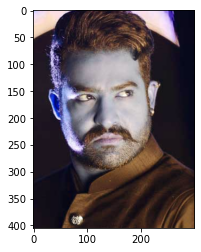

In [142]:
plt.imshow(img)

In [143]:
grey = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
grey.shape

(405, 300, 3)

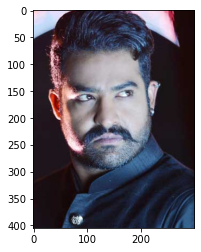

In [144]:
plt.imshow(grey)

## Haar Cascade technique which helps in detection of face in opencv

In [145]:
face_cascade = cv2.CascadeClassifier('C:/Users/sanka/celebrety face detection/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/sanka/celebrety face detection/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img,1.3,5)
faces

array([[ 28,  71, 221, 221]])

In [146]:
(x,y,w,h) = faces[0]
x,y,w,h

(28, 71, 221, 221)

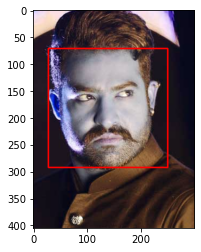

In [147]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)#thickness
plt.imshow(face_img)

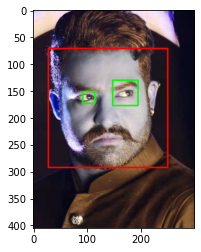

In [148]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_grey = grey[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_grey)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

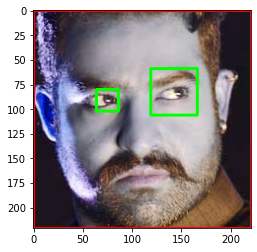

In [149]:
plt.imshow(roi_color,cmap='gray')

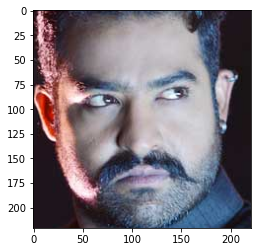

In [150]:
plt.imshow(roi_grey,cmap='gray')

In [151]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
        #roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_color)
        if len(eyes) >= 2:
            return roi_color

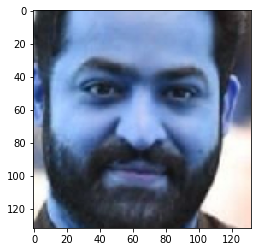

In [152]:
cropped_img = get_cropped_image_if_2_eyes('C:/Users/sanka/celebrety face detection/model/dataset/jr. ntr - Google Search/Jr Ntr Filmography _ Jr Ntr Movies Till.jpg')
plt.imshow(cropped_img)

In [153]:
path_to_cr_data = "C:/Users/sanka/celebrety face detection/model/dataset/cropped/"
path_to_data = "C:/Users/sanka/celebrety face detection/model/dataset/"

In [154]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [155]:
img_dirs

['C:/Users/sanka/celebrety face detection/model/dataset/dhoni - Google Search',
 'C:/Users/sanka/celebrety face detection/model/dataset/jr. ntr - Google Search',
 'C:/Users/sanka/celebrety face detection/model/dataset/ramcharan - Google Search',
 'C:/Users/sanka/celebrety face detection/model/dataset/virat kohli - Google Search',
 'C:/Users/sanka/celebrety face detection/model/dataset/yash - Google Search']

In [156]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [157]:
path_files=[]

for i in img_dirs:
    temp =[]
    for entry in os.scandir(i):
        temp.append(entry.path)
    path_files.append(temp)


In [158]:
celebrity_names = []
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    celebrity_names.append(celebrity_name)
    
celebrity_names[0]

'dhoni - Google Search'

In [159]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for i in range(len(path_files)):
    count = 1
    celebrity_file_names_dict[celebrity_names[i]] = []
    for impath in path_files[i]:
        roi_color = get_cropped_image_if_2_eyes(impath)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_names[i]
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_names[i] + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_names[i]].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  C:/Users/sanka/celebrety face detection/model/dataset/cropped/dhoni - Google Search
Generating cropped images in folder:  C:/Users/sanka/celebrety face detection/model/dataset/cropped/jr. ntr - Google Search
Generating cropped images in folder:  C:/Users/sanka/celebrety face detection/model/dataset/cropped/ramcharan - Google Search
Generating cropped images in folder:  C:/Users/sanka/celebrety face detection/model/dataset/cropped/virat kohli - Google Search
Generating cropped images in folder:  C:/Users/sanka/celebrety face detection/model/dataset/cropped/yash - Google Search


In [160]:
celebrity_file_names_dict

{'dhoni - Google Search': ['C:/Users/sanka/celebrety face detection/model/dataset/cropped/dhoni - Google Search/dhoni - Google Search1.jpg',
  'C:/Users/sanka/celebrety face detection/model/dataset/cropped/dhoni - Google Search/dhoni - Google Search2.jpg',
  'C:/Users/sanka/celebrety face detection/model/dataset/cropped/dhoni - Google Search/dhoni - Google Search3.jpg',
  'C:/Users/sanka/celebrety face detection/model/dataset/cropped/dhoni - Google Search/dhoni - Google Search4.jpg'],
 'jr. ntr - Google Search': ['C:/Users/sanka/celebrety face detection/model/dataset/cropped/jr. ntr - Google Search/jr. ntr - Google Search1.jpg',
  'C:/Users/sanka/celebrety face detection/model/dataset/cropped/jr. ntr - Google Search/jr. ntr - Google Search2.jpg',
  'C:/Users/sanka/celebrety face detection/model/dataset/cropped/jr. ntr - Google Search/jr. ntr - Google Search3.jpg',
  'C:/Users/sanka/celebrety face detection/model/dataset/cropped/jr. ntr - Google Search/jr. ntr - Google Search4.jpg',
  '

# Wavelet transform
## In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [161]:
#got from stackoverflow
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

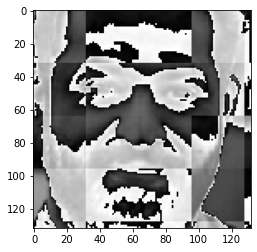

In [162]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [163]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count+1
class_dict

{'dhoni - Google Search': 0,
 'jr. ntr - Google Search': 1,
 'ramcharan - Google Search': 2,
 'virat kohli - Google Search': 3,
 'yash - Google Search': 4}

In [164]:
X= []
y= []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [165]:
len(X[0])

4096

In [166]:
len(y)

71

In [167]:
len(X)

71

In [168]:
X

[array([[ 30],
        [ 32],
        [ 88],
        ...,
        [112],
        [  7],
        [  7]], dtype=uint8),
 array([[ 29],
        [  6],
        [ 10],
        ...,
        [151],
        [254],
        [  0]], dtype=uint8),
 array([[185],
        [138],
        [ 94],
        ...,
        [ 13],
        [219],
        [ 24]], dtype=uint8),
 array([[ 93],
        [118],
        [126],
        ...,
        [ 86],
        [  6],
        [  7]], dtype=uint8),
 array([[ 23],
        [ 26],
        [ 28],
        ...,
        [ 38],
        [247],
        [  3]], dtype=uint8),
 array([[146],
        [184],
        [196],
        ...,
        [ 94],
        [ 94],
        [111]], dtype=uint8),
 array([[ 13],
        [ 18],
        [ 16],
        ...,
        [250],
        [  1],
        [  0]], dtype=uint8),
 array([[121],
        [126],
        [129],
        ...,
        [100],
        [104],
        [  0]], dtype=uint8),
 array([[ 97],
        [ 88],
        [104],
        ...

In [169]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(71, 4096)

In [170]:
X


array([[ 30.,  32.,  88., ..., 112.,   7.,   7.],
       [ 29.,   6.,  10., ..., 151., 254.,   0.],
       [185., 138.,  94., ...,  13., 219.,  24.],
       ...,
       [ 26.,  12.,   9., ..., 207., 216., 234.],
       [ 33.,  41.,  66., ..., 209., 204., 226.],
       [ 25.,  30.,  29., ...,  79., 242.,  32.]])

In [171]:
y

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

# SVM 

In [172]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5555555555555556

In [174]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.20      1.00      0.33         1
           2       0.00      0.00      0.00         4
           3       0.64      1.00      0.78         7
           4       1.00      0.33      0.50         6

    accuracy                           0.56        18
   macro avg       0.46      0.58      0.40        18
weighted avg       0.59      0.56      0.49        18



C:\Users\sanka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [176]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [177]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\sanka\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\sanka\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\sanka\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.583636,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.400000,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.492727,{'logisticregression__C': 1}


In [178]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [179]:
best_estimators['svm'].score(X_test,y_test)

0.6666666666666666

In [180]:
best_estimators['random_forest'].score(X_test,y_test)

0.5

In [181]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.5555555555555556

In [182]:
best_clf = best_estimators['logistic_regression']

In [183]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 2, 0, 1],
       [3, 0, 0, 4, 0],
       [1, 1, 1, 0, 3]], dtype=int64)

Text(69.0, 0.5, 'Truth')

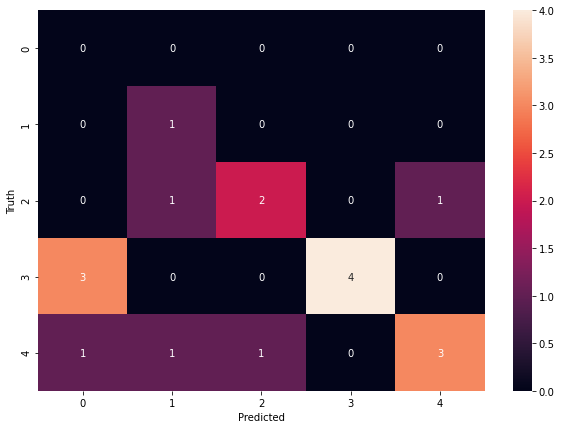

In [184]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [185]:
class_dict

{'dhoni - Google Search': 0,
 'jr. ntr - Google Search': 1,
 'ramcharan - Google Search': 2,
 'virat kohli - Google Search': 3,
 'yash - Google Search': 4}

In [186]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [187]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

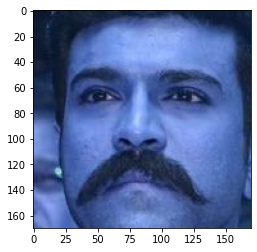

In [189]:
img_c = cv2.imread('C:/Users/sanka/celebrety face detection/model/dataset/cropped/ramcharan - Google Search/8888.jpg')
plt.imshow(img_c)

In [190]:
img_c2 = cv2.resize(img_c,(32,32))

In [191]:
img_c2.shape

(32, 32, 3)

In [192]:
img_c3 = w2d(img_c2,'db1',5)
img_c3.shape

(32, 32)

In [193]:
combined_img_c = np.vstack((img_c2.reshape(32*32*3,1),img_c3.reshape(32*32,1)))

In [194]:
len(combined_img_c)

4096

In [195]:
combined_img_ck = combined_img_c.reshape(1,-1)

In [196]:
combined_img_ck.shape

(1, 4096)

In [197]:
best_clf.predict(combined_img_ck)[0]

2

In [198]:
class_dict

{'dhoni - Google Search': 0,
 'jr. ntr - Google Search': 1,
 'ramcharan - Google Search': 2,
 'virat kohli - Google Search': 3,
 'yash - Google Search': 4}